# Ham or Spam?

In [1]:
# when installing nltk for the first time we need to also download a few built in libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import nltk.corpus
from nltk.corpus import stopwords
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinelv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/justinelv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/justinelv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loead data in dataframe
df = pd.read_pickle("email")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


The dataset is made up of email that are classified as ham [0] or spam[1]. You need to clean the dataset before training a prediction model.

## Remove Punctuation

👇 Create a function to remove the punctuation. Apply it to the entire data and add the output as a new column in the dataframe called `clean_text`

In [13]:
# I tested several ways to make the function 
#def remove_ponct(df):
#    df["clean_text"] = df['text'].replace(r'[^\w\s]','', regex=True)    

In [21]:
#def remove_punctuations(text):
#    for char in string.punctuation:
#        text = text.replace(char, '')
#    return text

# apply the function:
#df['clean_text'] = df['text'].apply(remove_punctuations)


In [3]:
def remove_ponct2(df):
    df["clean_text"] = df['text'].str.translate(str.maketrans('','',string.punctuation))
    
remove_ponct2(df)
df

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...
...,...,...,...
5723,Subject: re : research and development charges...,0,Subject re research and development charges t...
5724,"Subject: re : receipts from visit jim , than...",0,Subject re receipts from visit jim thanks ...
5725,Subject: re : enron case study update wow ! a...,0,Subject re enron case study update wow all ...
5726,"Subject: re : interest david , please , call...",0,Subject re interest david please call shi...


## Lower Case

👇 Create a function to lower case the text. Apply it to `clean_text`

In [4]:
# I tested several ways to make the function
#def lower_case(df):
#    df['clean_text']=df['clean_text'].str.lower()

In [5]:
def lower_case(text):
    return text.lower()

df['clean_text'] = df['clean_text'].apply(lower_case)

In [6]:
df

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,subject 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,subject do not have money get software cds fr...
...,...,...,...
5723,Subject: re : research and development charges...,0,subject re research and development charges t...
5724,"Subject: re : receipts from visit jim , than...",0,subject re receipts from visit jim thanks ...
5725,Subject: re : enron case study update wow ! a...,0,subject re enron case study update wow all ...
5726,"Subject: re : interest david , please , call...",0,subject re interest david please call shi...


## Remove Numbers

👇 Create a function to remove numbers from the text. Apply it to `clean_text`

In [7]:
# I tested several ways to make the function
#def remove_number(df):
#    df['clean_text'] = df['clean_text'].str.replace(r'\d+','', regex=True)

In [8]:
def remove_number(text):
    return ''.join([word for word in text if not word.isdigit()])

df['clean_text'] = df['clean_text'].apply(remove_number)
df

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,subject color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,subject do not have money get software cds fr...
...,...,...,...
5723,Subject: re : research and development charges...,0,subject re research and development charges t...
5724,"Subject: re : receipts from visit jim , than...",0,subject re receipts from visit jim thanks ...
5725,Subject: re : enron case study update wow ! a...,0,subject re enron case study update wow all ...
5726,"Subject: re : interest david , please , call...",0,subject re interest david please call shi...


## Remove StopWords

👇 Create a function to remove stopwords from the text. Apply it to `clean_text`.

In [9]:
# I tested several ways to make the function
#def remove_stopwords(df):
#    stop_words = stopwords.words('english')
#    df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [10]:
#def remove_stopwords(text):
  #  return ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])

#df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [11]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    word_tokens = word_tokenize(text)
    filtered_text = " ".join([word for word in word_tokens if not word in stop_words])
    return filtered_text

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [12]:
df

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject money get software cds software compat...
...,...,...,...
5723,Subject: re : research and development charges...,0,subject research development charges gpg forwa...
5724,"Subject: re : receipts from visit jim , than...",0,subject receipts visit jim thanks invitation v...
5725,Subject: re : enron case study update wow ! a...,0,subject enron case study update wow day super ...
5726,"Subject: re : interest david , please , call...",0,subject interest david please call shirley cre...


## Lemmatize

👇 Create a function to lemmatize the text. Make sure the output is a single string, not a list of words. Apply it to `clean_text`.

In [13]:
def lemmatize_text(text):
  
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_words = " ".join([lemmatizer.lemmatize(word) for word in word_tokens])
    return lemmatized_words

df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [15]:
df

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new home made easy im wan...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject money get software cd software compati...
...,...,...,...
5723,Subject: re : research and development charges...,0,subject research development charge gpg forwar...
5724,"Subject: re : receipts from visit jim , than...",0,subject receipt visit jim thanks invitation vi...
5725,Subject: re : enron case study update wow ! a...,0,subject enron case study update wow day super ...
5726,"Subject: re : interest david , please , call...",0,subject interest david please call shirley cre...


## Bag-of-words Modelling

👇 Vectorize the `clean_text` to a Bag-of-Words representation with a default CountVectorizer . Save as `X_bow`.

In [16]:
# Choose the vectorisor
vectorizor = CountVectorizer()

In [17]:
# Create X_bow
X_bow = vectorizor.fit_transform(df['clean_text']).toarray()
columns = vectorizor.get_feature_names_out()
# create a df for visualize the bag of words
df_X_bow = pd.DataFrame(X_bow,columns=columns )
df_X_bow

,aa,aaa,aaaenerfax,aadedeji,aagrawal,aal,aaldous,aaliyah,aall,aanalysis,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


👇 Cross-validate a MultinomialNB model with the Bag-of-words. Score the model's accuracy.

In [18]:
# def X et y
X = X_bow
y = df['spam']

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creat the model 
clf = MultinomialNB()

# Fit the modèle
results = clf.fit(X_train, y_train)

# Make prediction
y_pred = clf.predict(X_test)

In [19]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9912739965095986


The model have a good score for detecting spam.

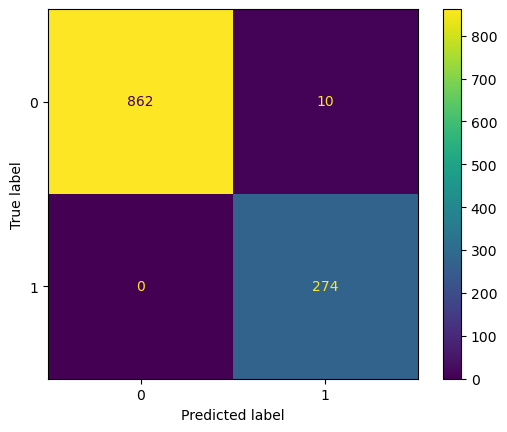

In [21]:
# We can add a confusion matrix for have more details on classification results.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Model make some mistakes with no spam detected as spam.

In [25]:
# make a cross validation 
results_2 = cross_validate(clf, X, y, cv=5,scoring='accuracy')
results_2

{'fit_time': array([1.88163781, 1.98160481, 1.92150307, 1.86086464, 1.91485   ]),
 'score_time': array([0.149014  , 0.13679004, 0.13092089, 0.13902211, 0.14399815]),
 'test_score': array([0.98691099, 0.9895288 , 0.991274  , 0.98777293, 0.99213974])}

In [26]:
results_2['test_score'].mean()

0.9895252901681946

The model with the cross validation give a good score but a lower score than before.

⚠️ Please push the exercise once you are done 🙃

## 🏁 